# Machine Learning Algorithms - (5) K-Nearest Neighbors

<div style="border: 1px solid #007acc; background-color: #e6f4ff; padding: 10px; border-radius: 5px; color: black;">
  <strong>📘 Info:</strong> I do not claim ownership of the content in this notebook. It is based on different tutorials and resources. Parts of the code or text may have been copy-pasted or adapted directly from those or other sources for learning purposes.
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

## 1. What is K-Nearest Neighbors (KNN)?

K-Nearest Neighbors (KNN) is a simple, instance-based learning algorithm used for both classification and regression tasks.

It makes predictions based on the **majority class (classification)** or the **average value (regression)** of the $k$ closest training examples in the feature space.

Key Concepts:
- Distance metric: Most commonly, Euclidean distance is used to measure similarity.
- Hyperparameter $k$: Number of neighbors to consider.
- Lazy learning: KNN doesn't learn an explicit function; all computation happens at prediction time.

## 2. Euclidean Distance

Given two points:

$$
x = (x_1, x_2, \ldots, x_n), \quad y = (y_1, y_2, \ldots, y_n)
$$

The Euclidean distance between them is:

$$
d(x, y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}
$$

## 3. Prepare Dataset

In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Implement KNN

In [4]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def _euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def _predict_one(self, x):
        # Compute distances from x to all training points
        distances = [self._euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get the k nearest labels
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Majority vote
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def predict(self, X):
        return np.array([self._predict_one(x) for x in tqdm(X, desc="Predicting")])

In [5]:
model = KNN(k=3)
model.fit(X_train, y_train)

## 5. Model Evaluation

In [6]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Predicting: 100%|██████████| 30/30 [00:00<00:00, 2717.81it/s]

Test Accuracy: 1.00


## 6. Visualize Decision Boundary (2D)

We can visualize the decision boundaries using only the first two features of the Iris dataset.

Predicting: 100%|██████████| 2464/2464 [00:00<00:00, 3703.79it/s]


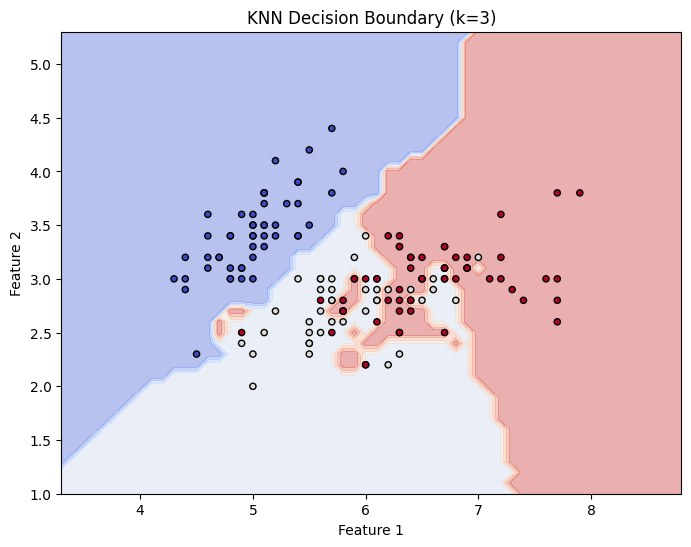

In [7]:
def plot_knn_decision_boundary(k=3):
    X_2d = X[:, :2]
    X_train_2d, X_test_2d, y_train_, y_test_ = train_test_split(X_2d, y, test_size=0.2, random_state=42)

    clf = KNN(k=k)
    clf.fit(X_train_2d, y_train_)

    # Create mesh grid
    h = 0.1
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict for each point in the grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(grid_points)
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=20, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_knn_decision_boundary(k=3)

## 7. Summary and Takeaways

Pros:
- Simple and intuitive
- No training time
- Works well with small datasets

Cons:
- Computationally expensive at prediction time
- Sensitive to irrelevant or redundant features
- Needs feature scaling (e.g., standardization)

When to Use KNN?
- When the dataset is small and low-dimensional
- When interpretability is not the top concern
- As a baseline model in classification tasks